In [ ]:
import numpy as np
from utils.multiple_hits_utils import read_multiple_hits

# GENERATE/IMPORT

In [ ]:
# Read multiple hits from specific directory
num_runs = 500
en1 = 20.0; en2 = 20.0
name = 'center_%.1fGeV_outside_%.1f_%iruns' %(en1, en2, num_runs)
images, labels, my_dict = read_multiple_hits('simulations/multiple_hits/', name, add_noise=False, read_dict=True)
print(images.shape)

In [ ]:
images.shape

# TESTING 

Run info: {'run': 480, 'energy1': 20.0, 'energy2': 20.0, 'particle 2 center': (1.0, 5.0), 'center_differences': 5.0990195135927845}


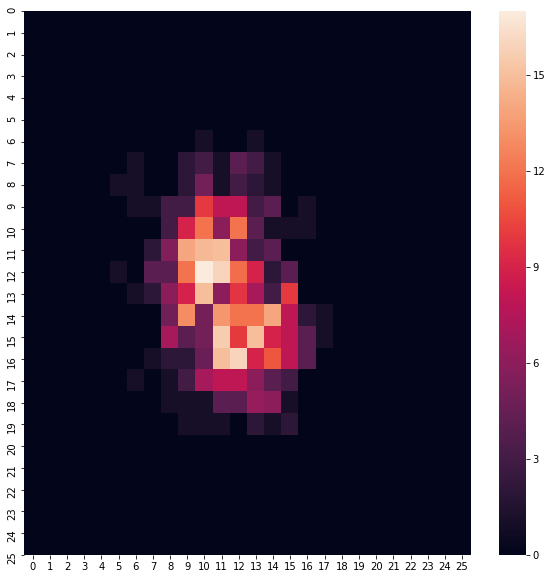

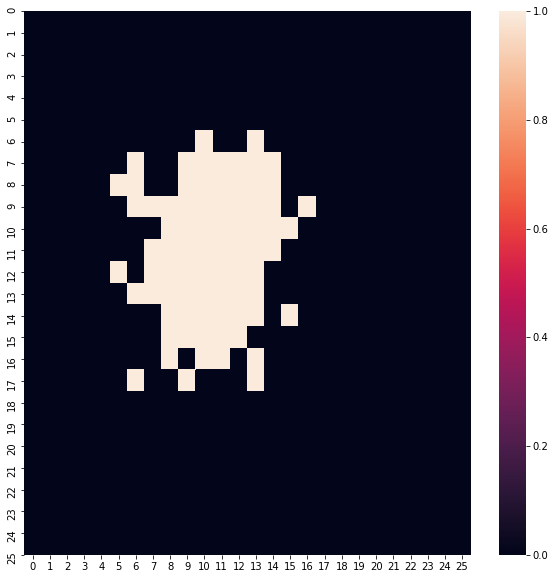

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cv2

example_num = 480
layer = 10
print('Run info:', my_dict[str(example_num)])
run_images = images[example_num, :, :, :, :]
image = run_images[layer, :, :, 0]

plt.figure(figsize=(10,10))
# plt.title('Two clusters ionisations count')
sns.heatmap(image[14:40, 12:38])
plt.show()

run_labels = labels[example_num, :, :, :, :]
label = run_labels[layer, :, :, 0]
plt.figure(figsize=(10,10))
sns.heatmap(label[14:40, 12:38])
plt.show()

In [ ]:
model = tf.keras.models.load_model('models_saved/unet-3d-48/unet3d_trial3-gpu-iter7-dice0.9441.h5', 
                                   custom_objects={'dice_coef' : dice_coef})

# Save as video

In [5]:
print(run_images.shape)

(32, 48, 48, 1)


* ... Saving... *


C:\Users\msham6\AppData\Local\Continuum\anaconda3\envs\cs231n\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


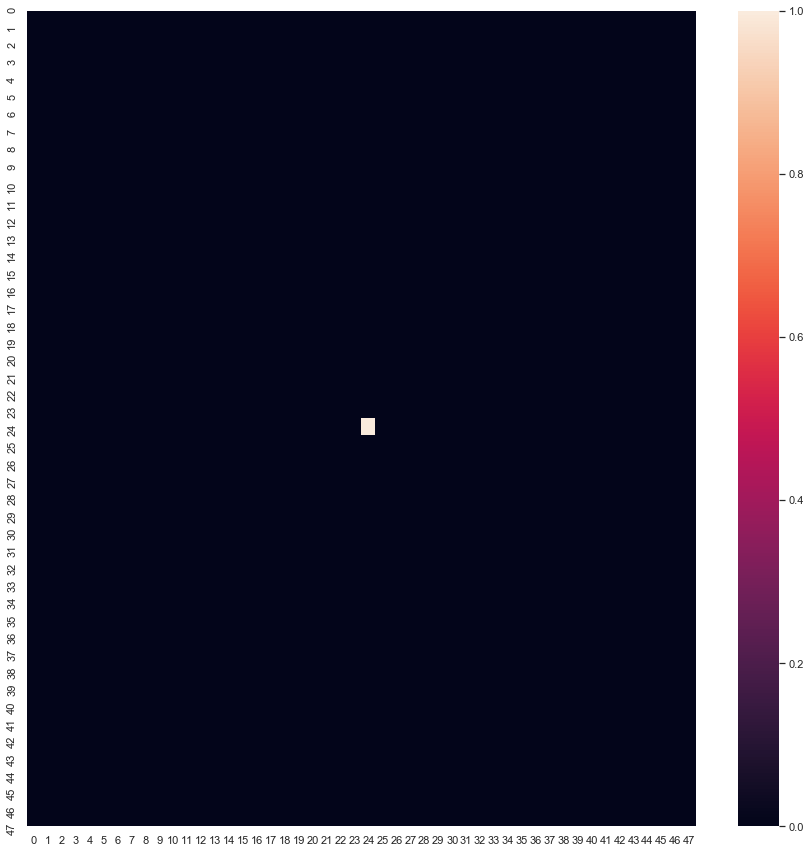

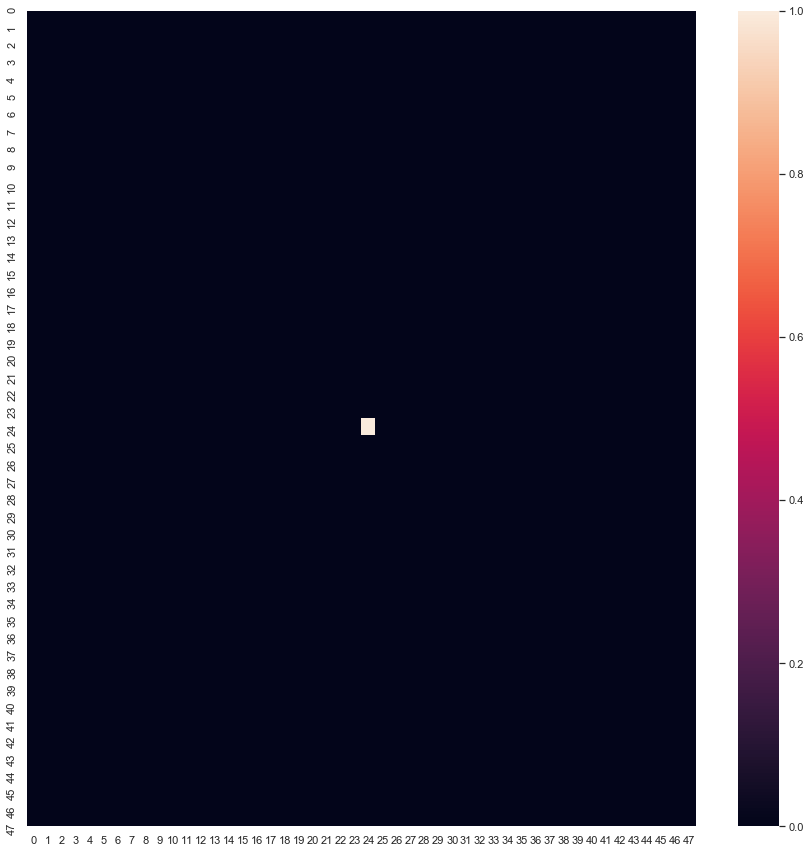

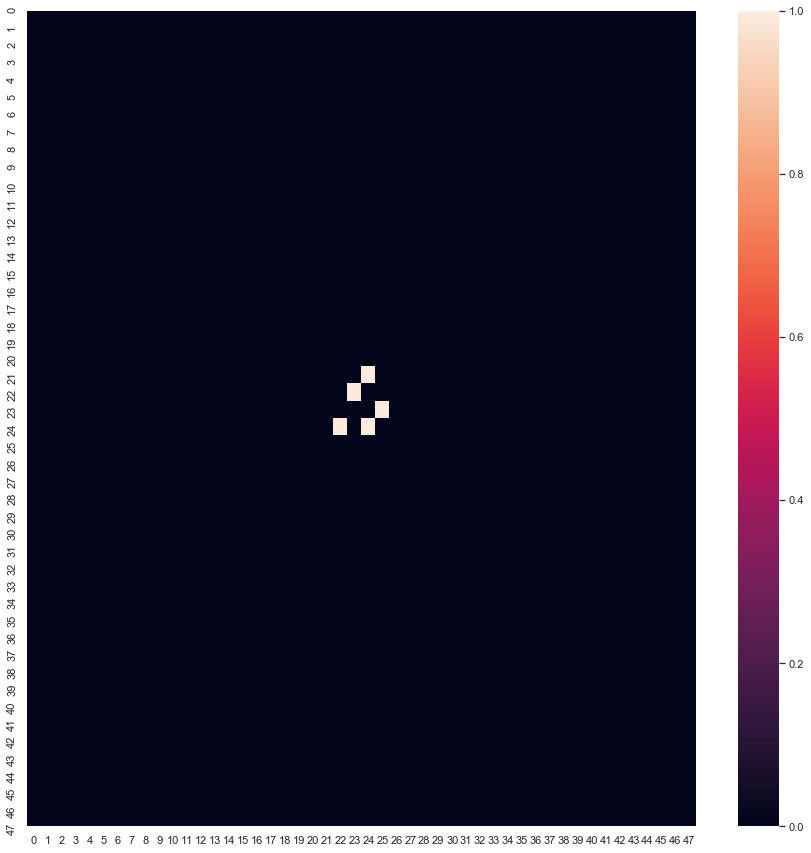

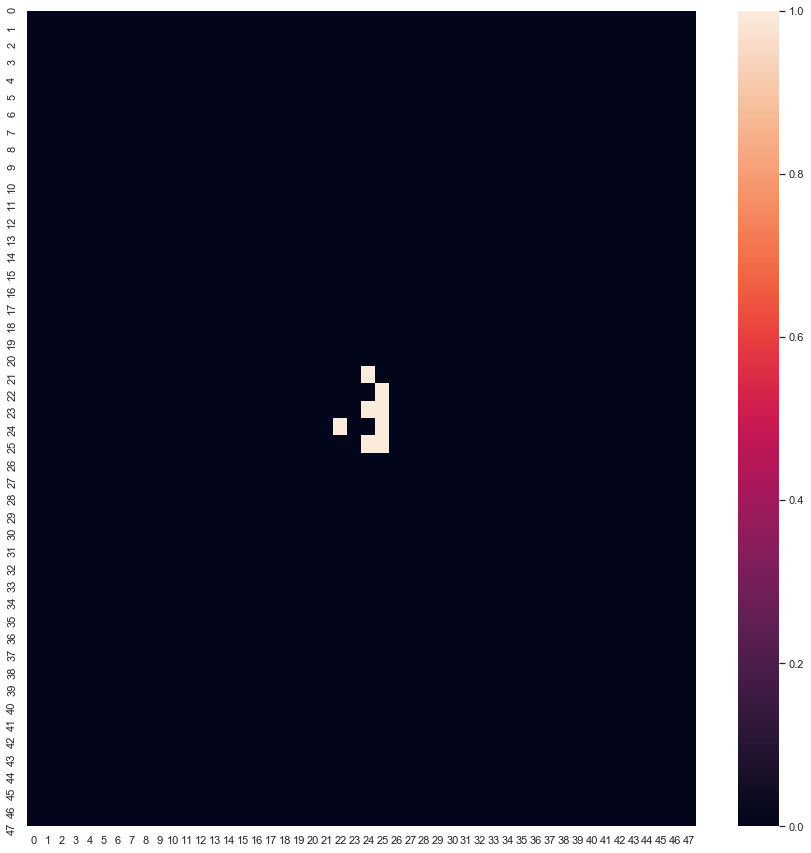

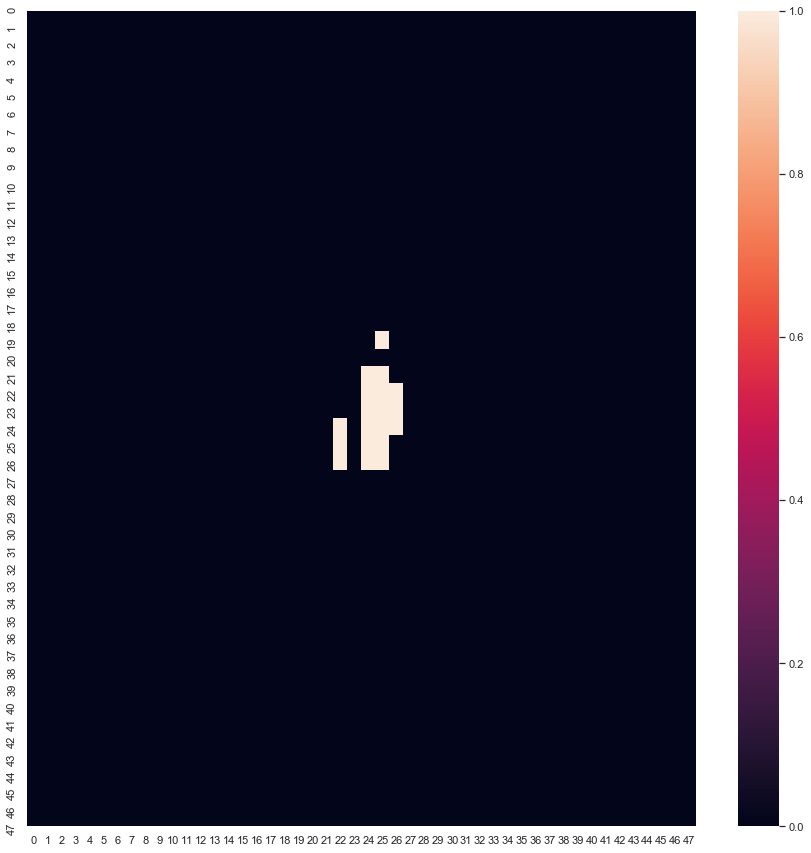

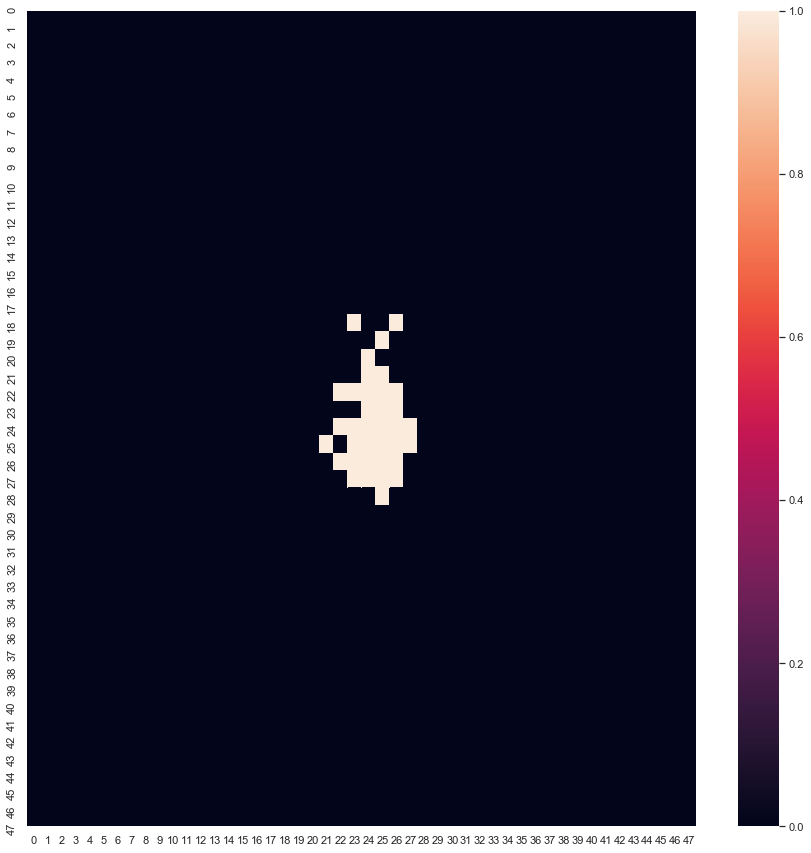

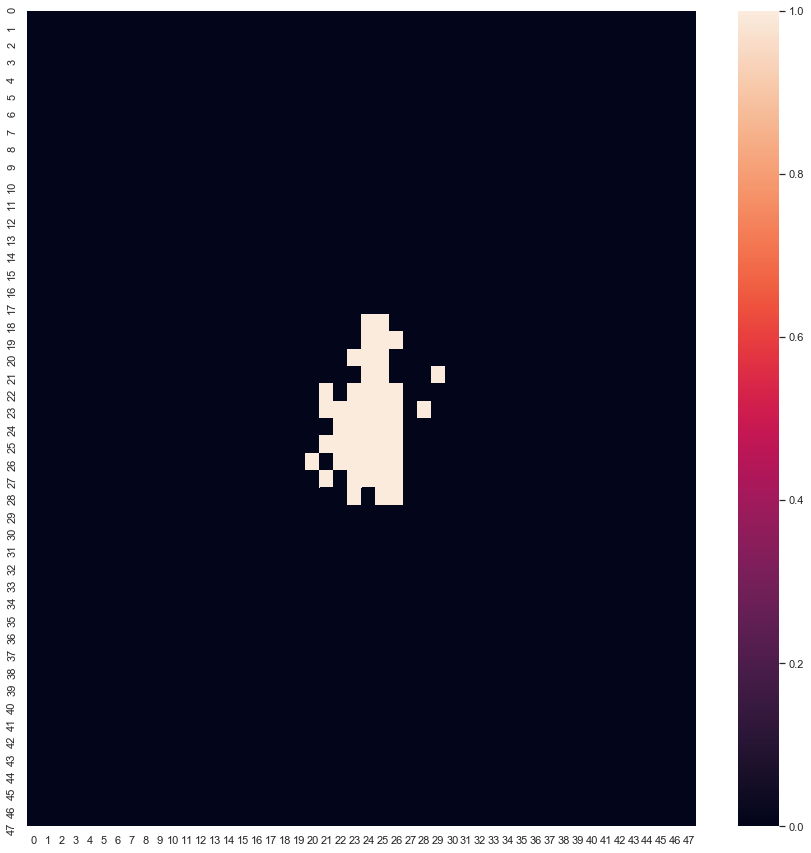

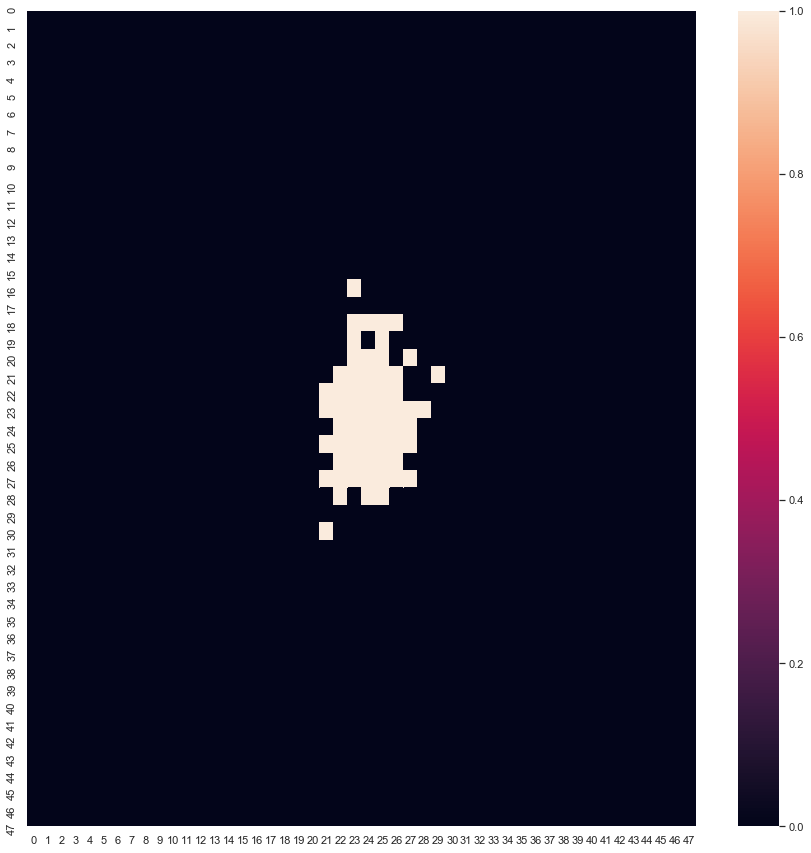

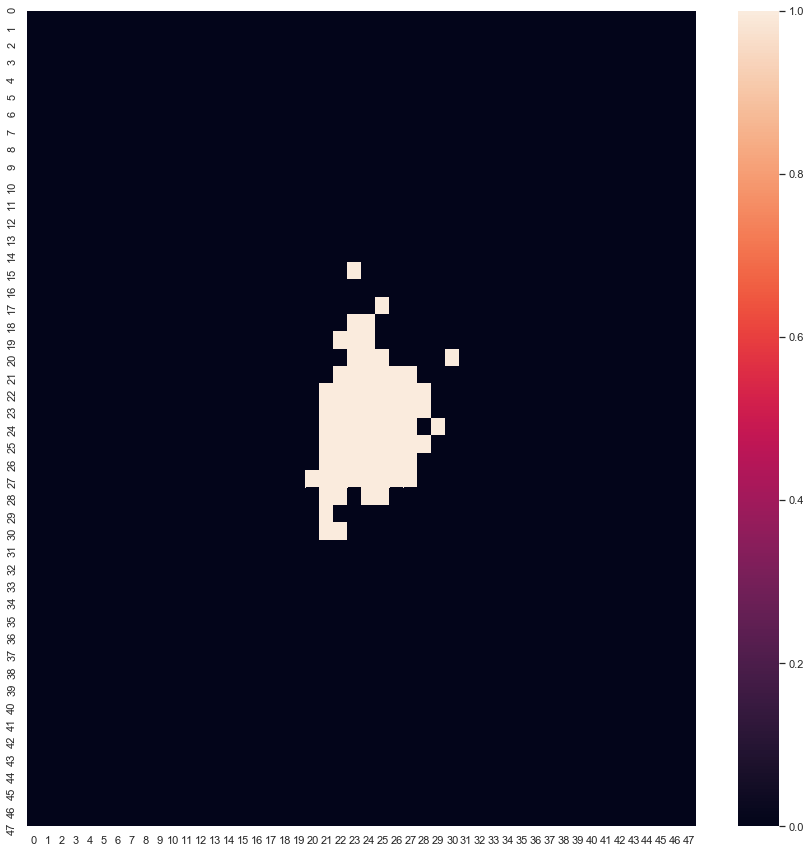

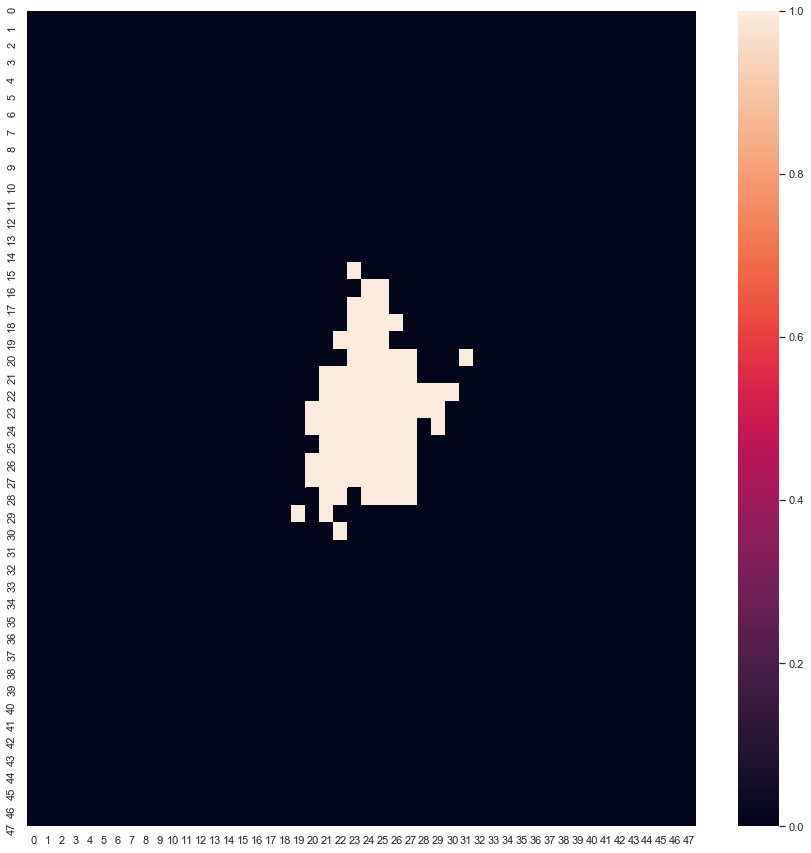

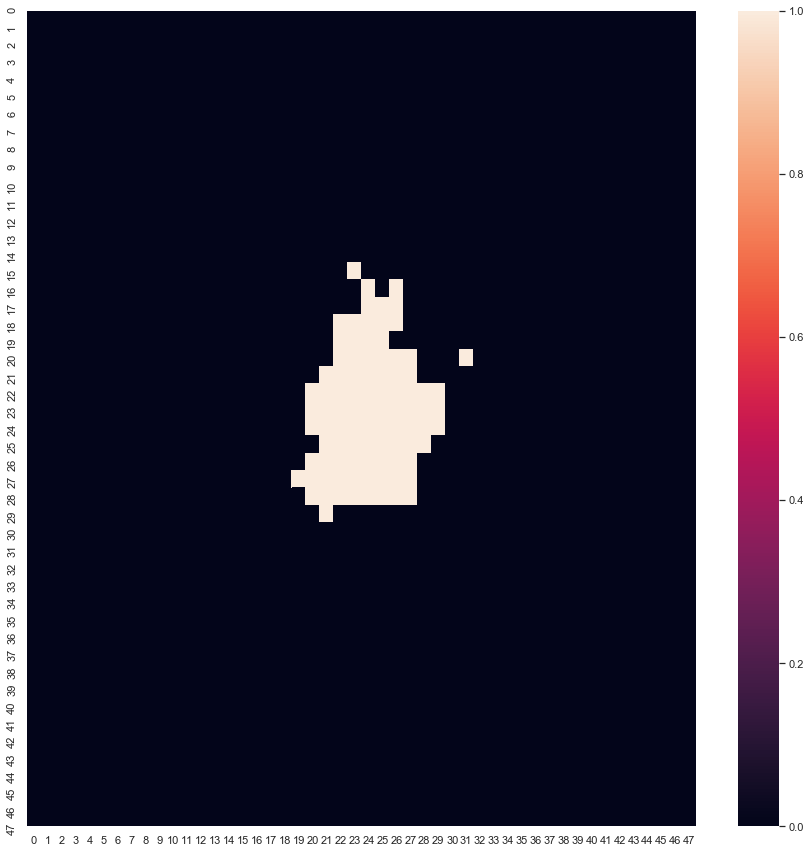

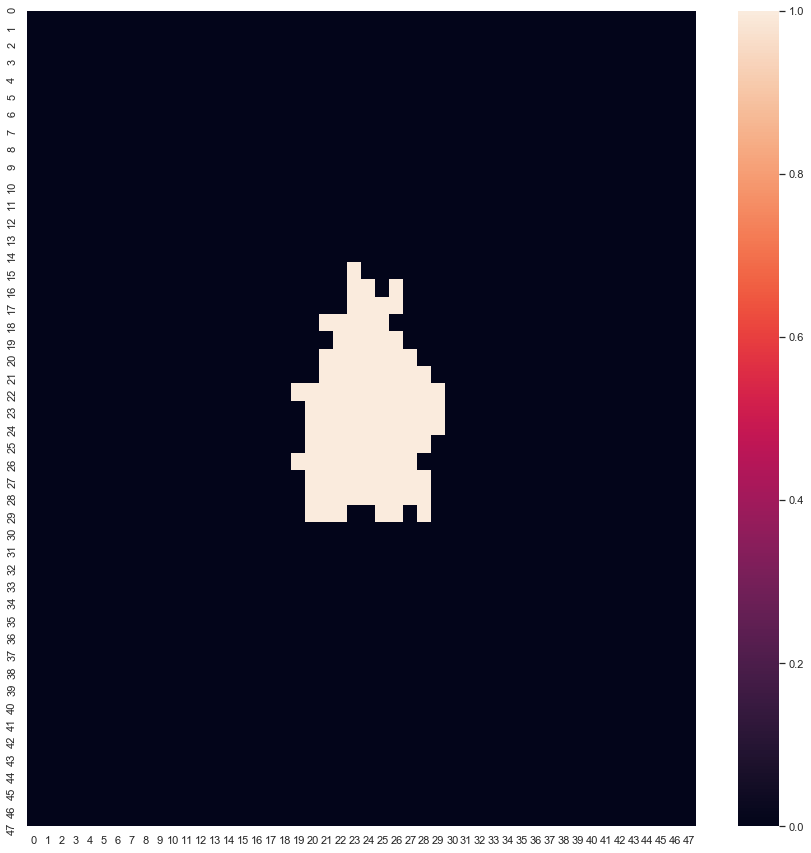

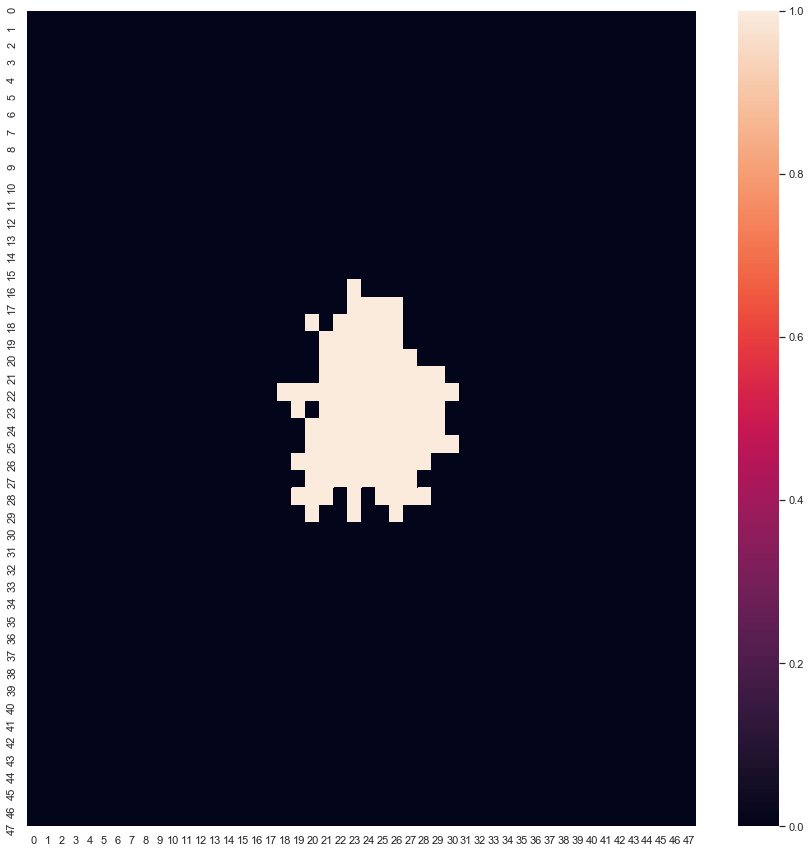

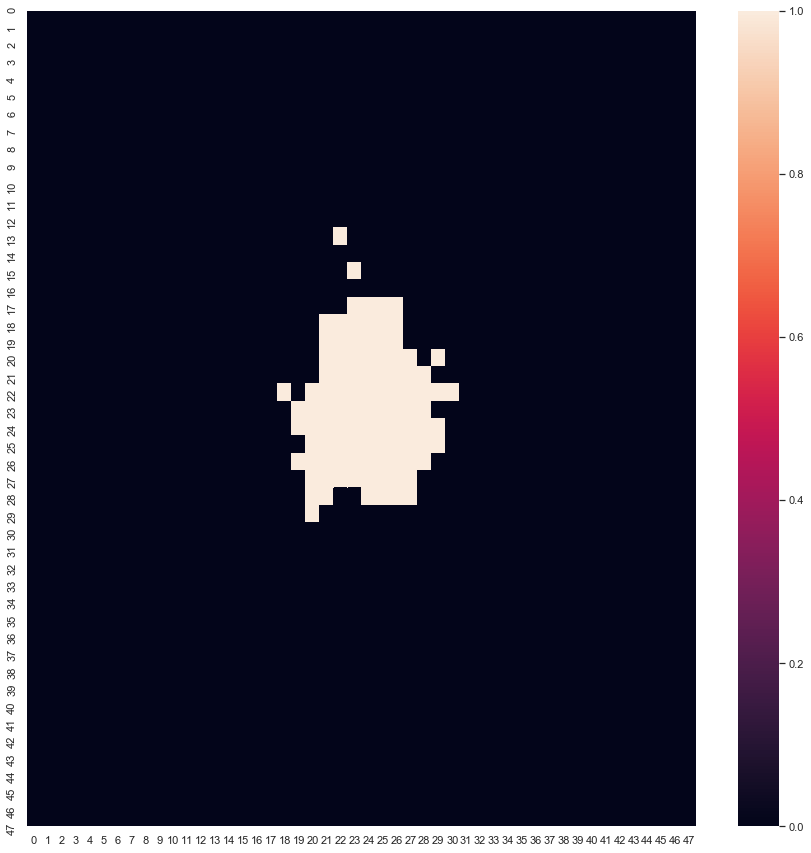

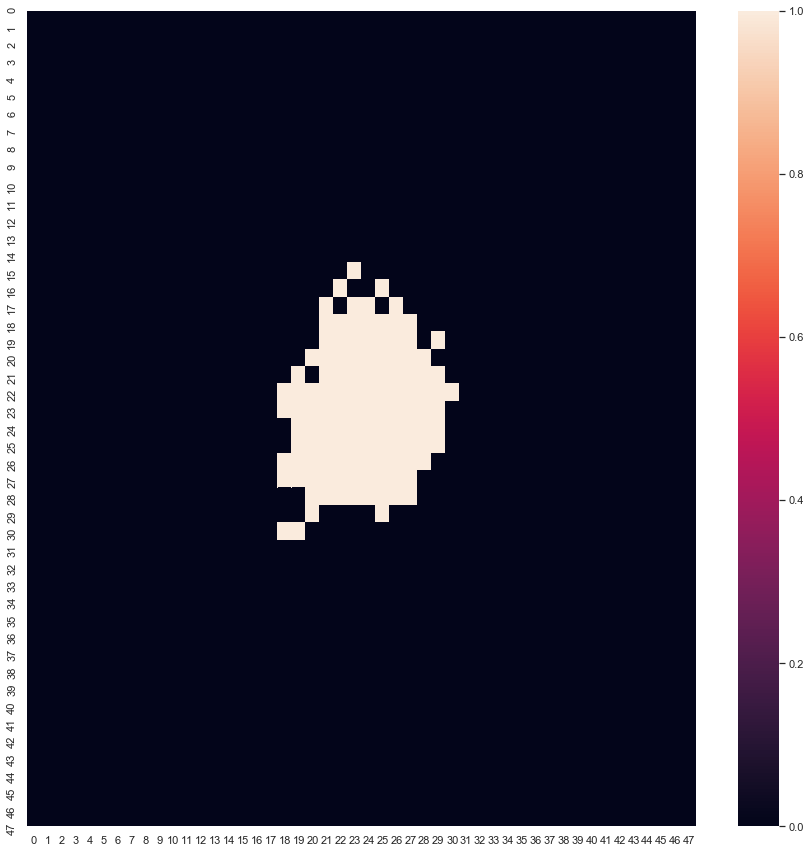

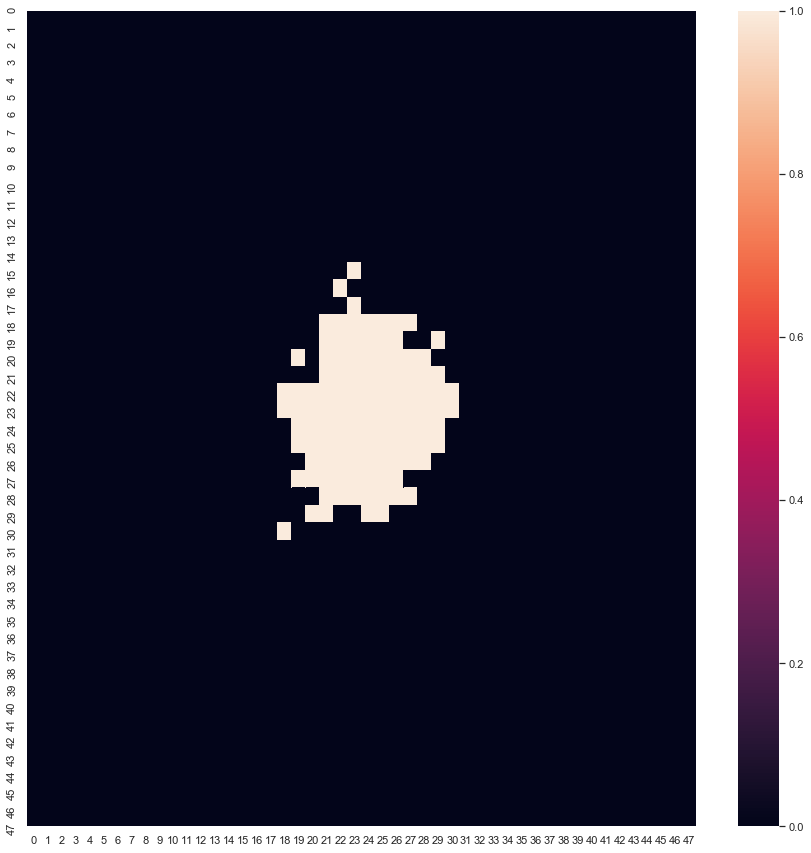

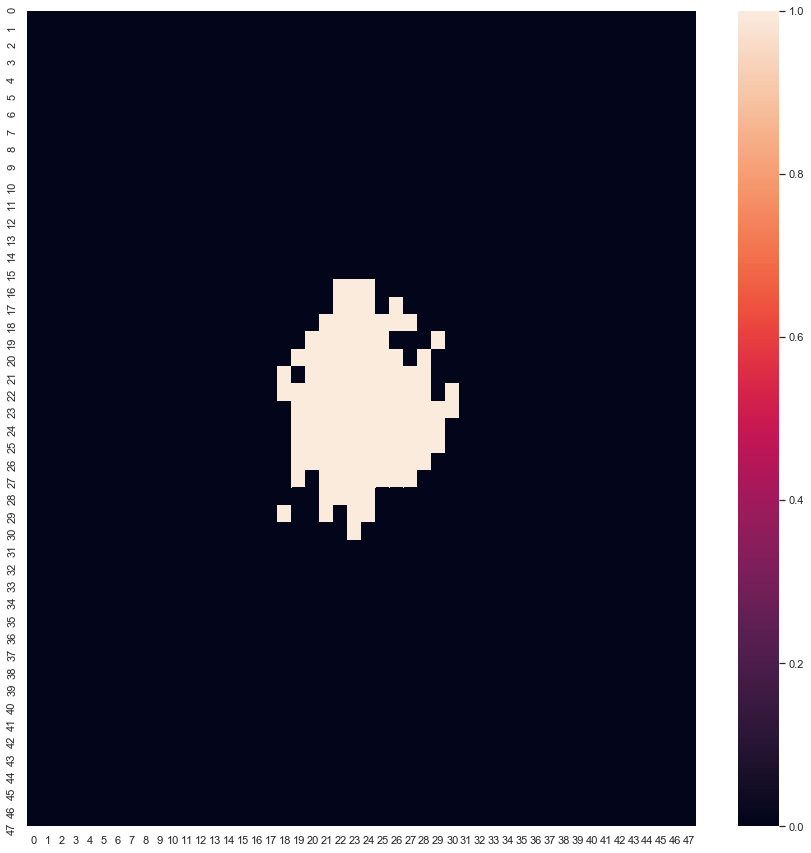

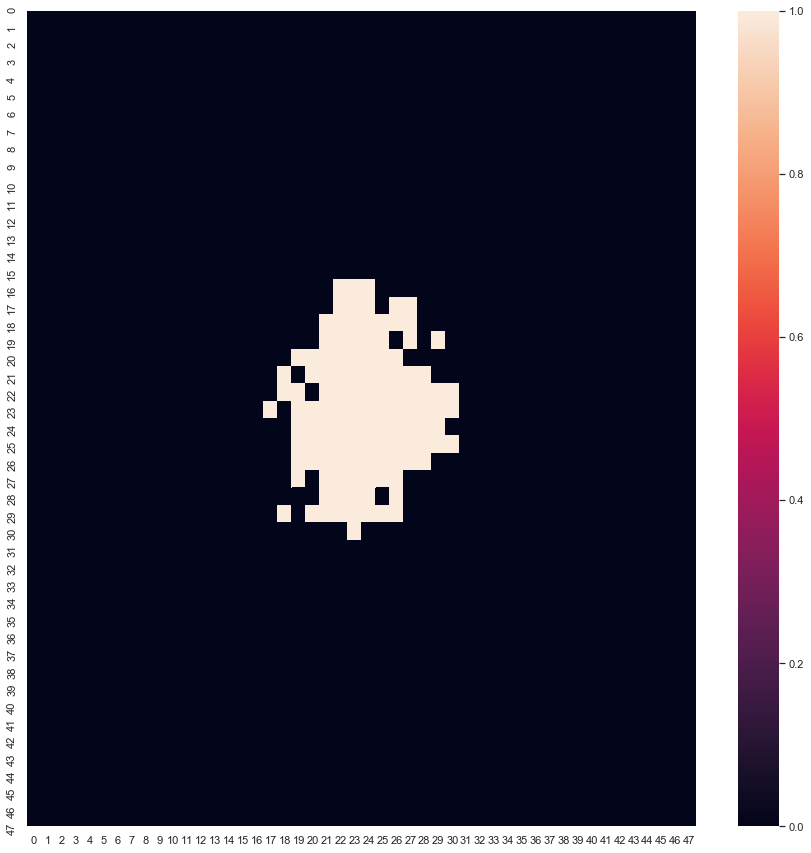

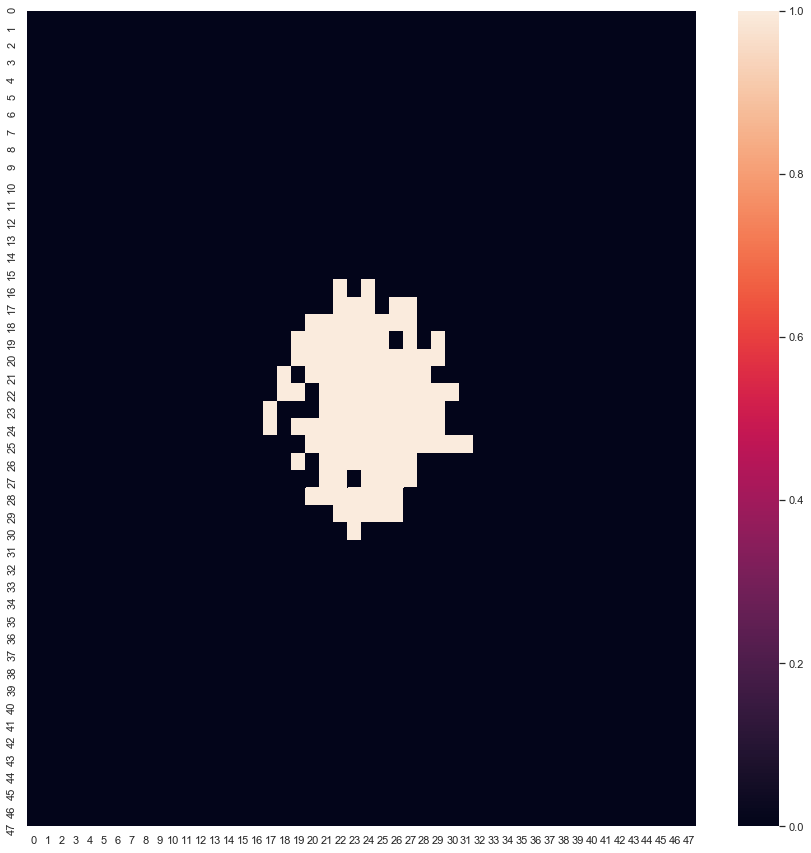

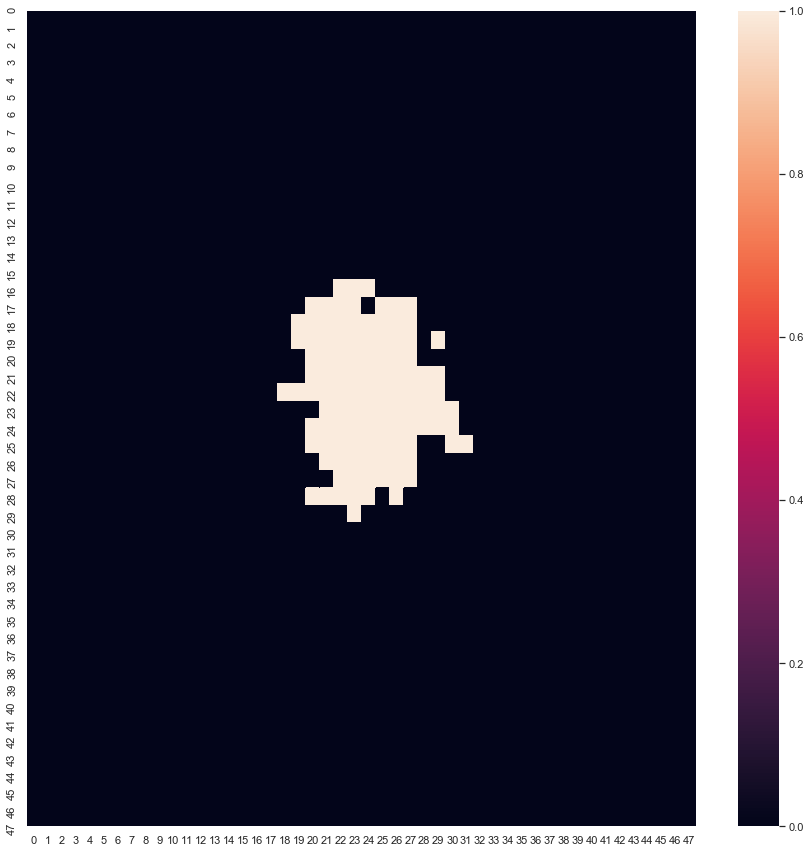

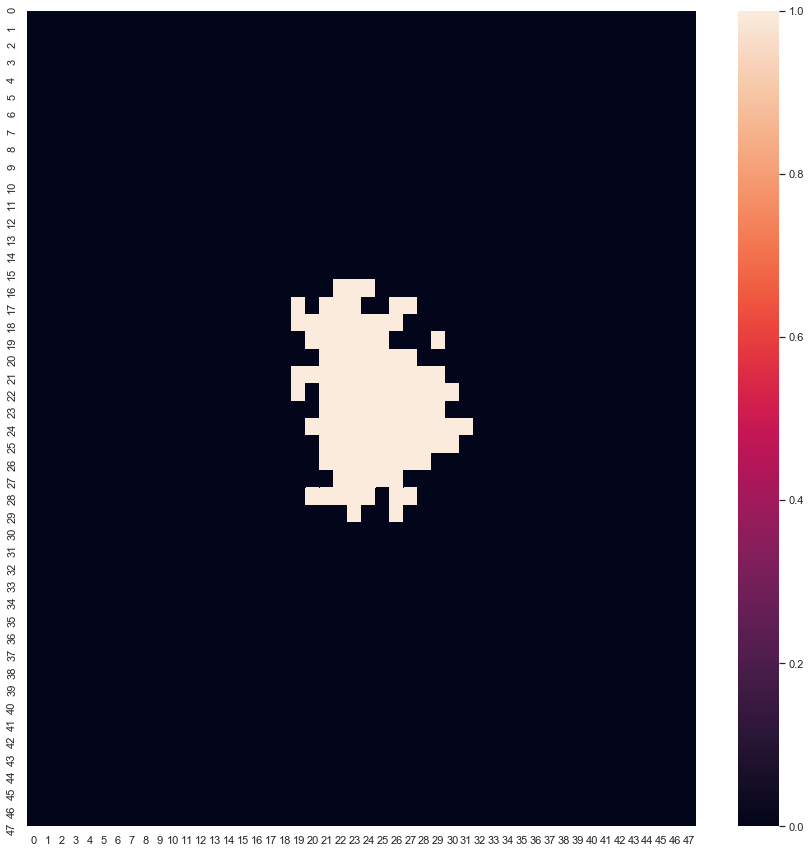

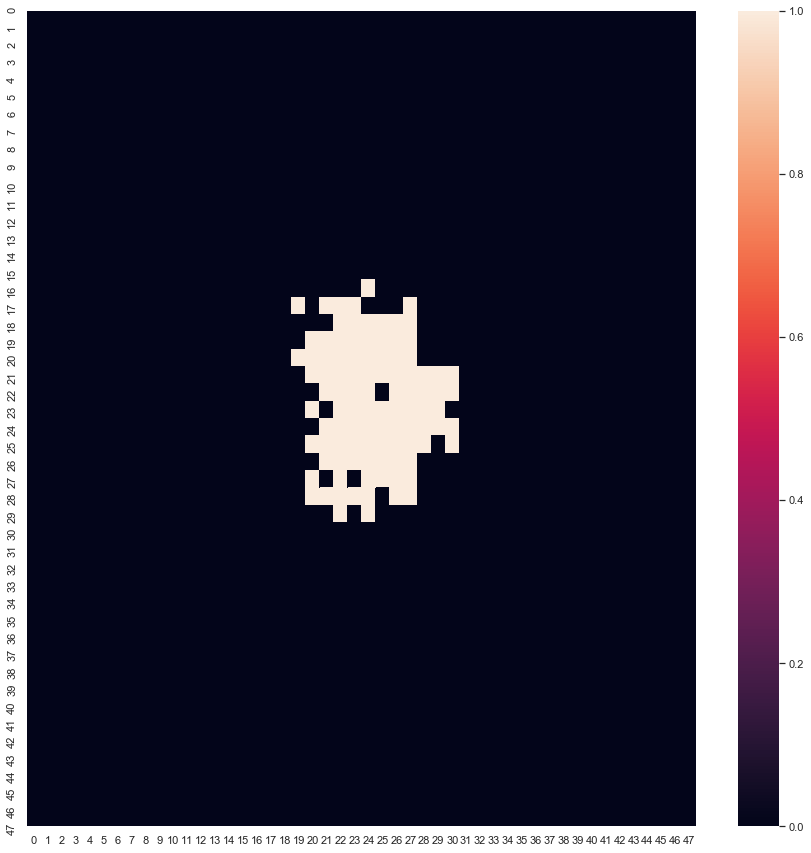

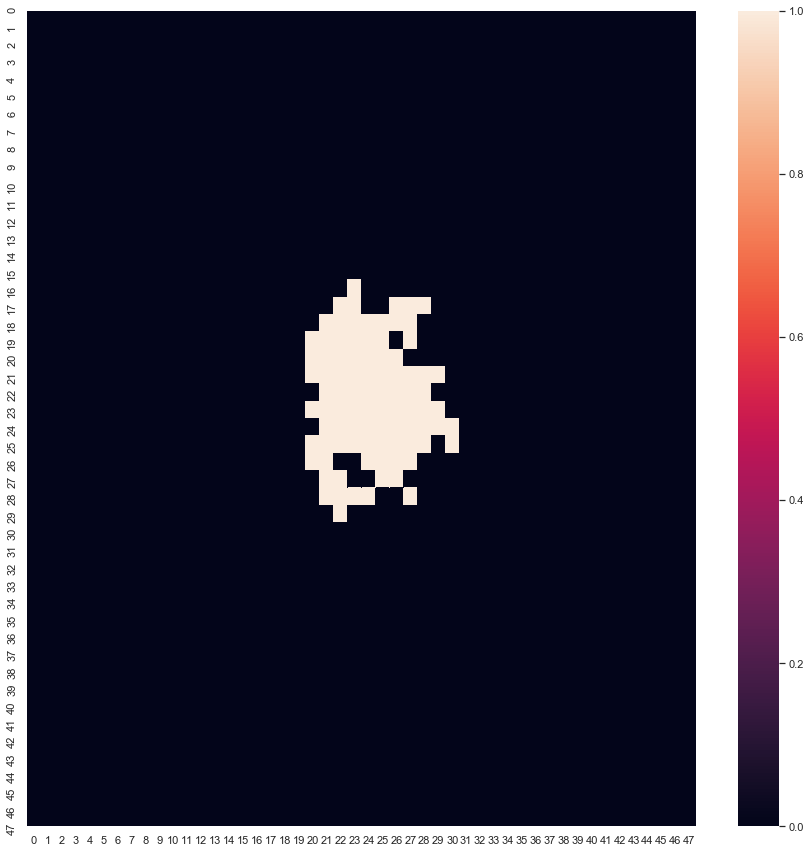

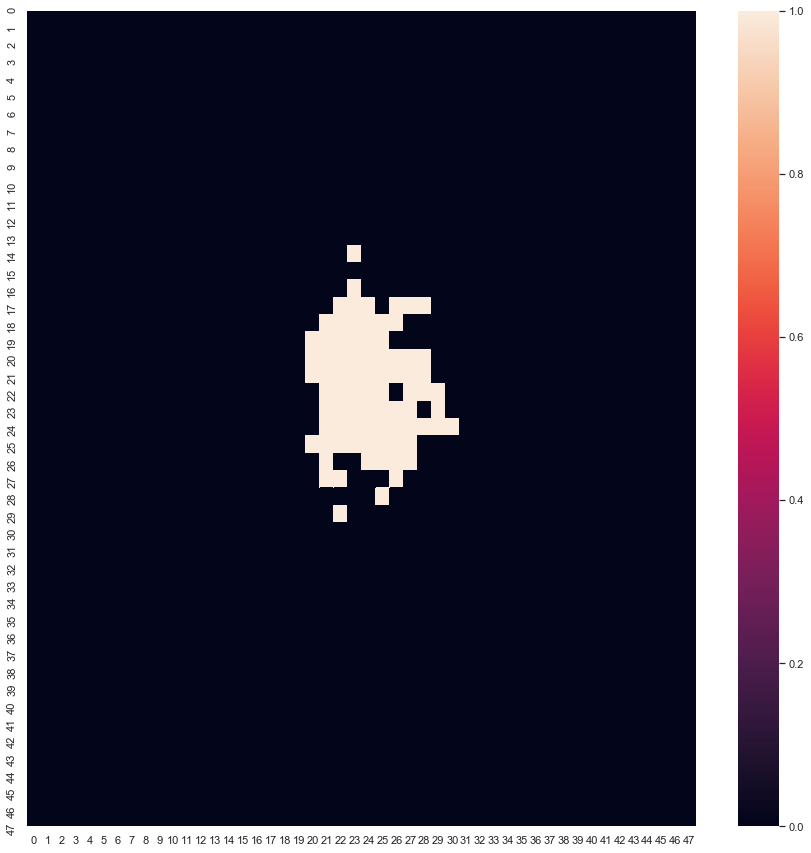

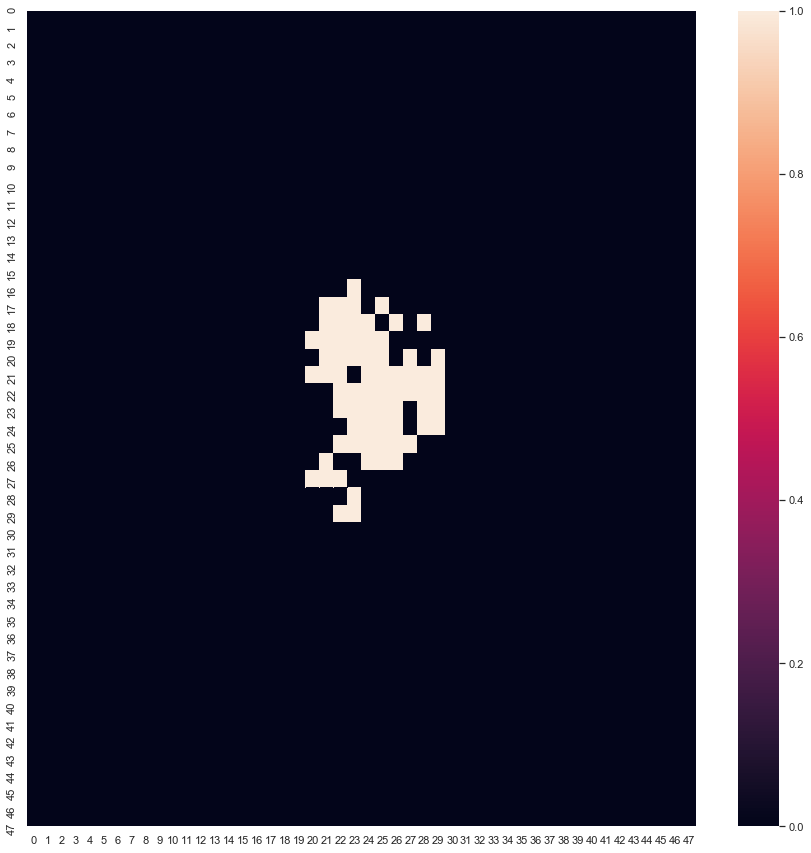

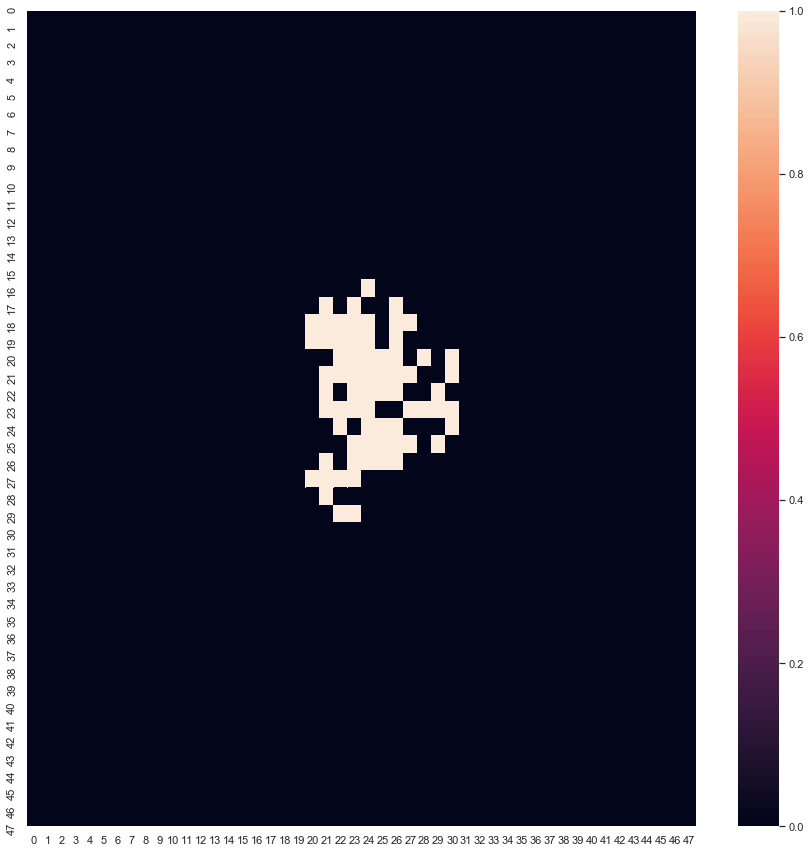

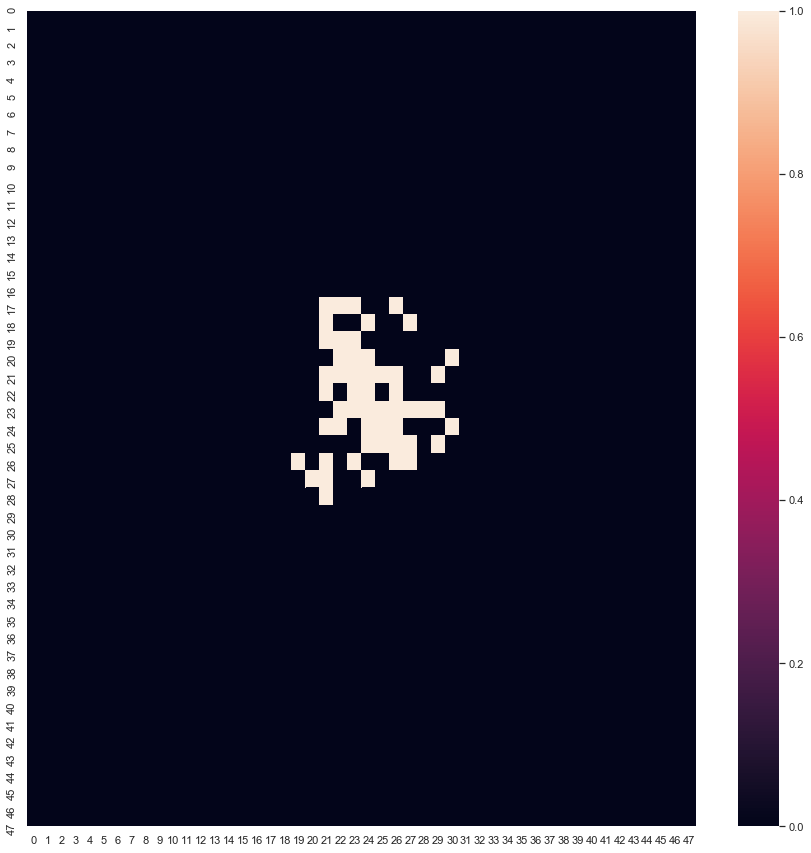

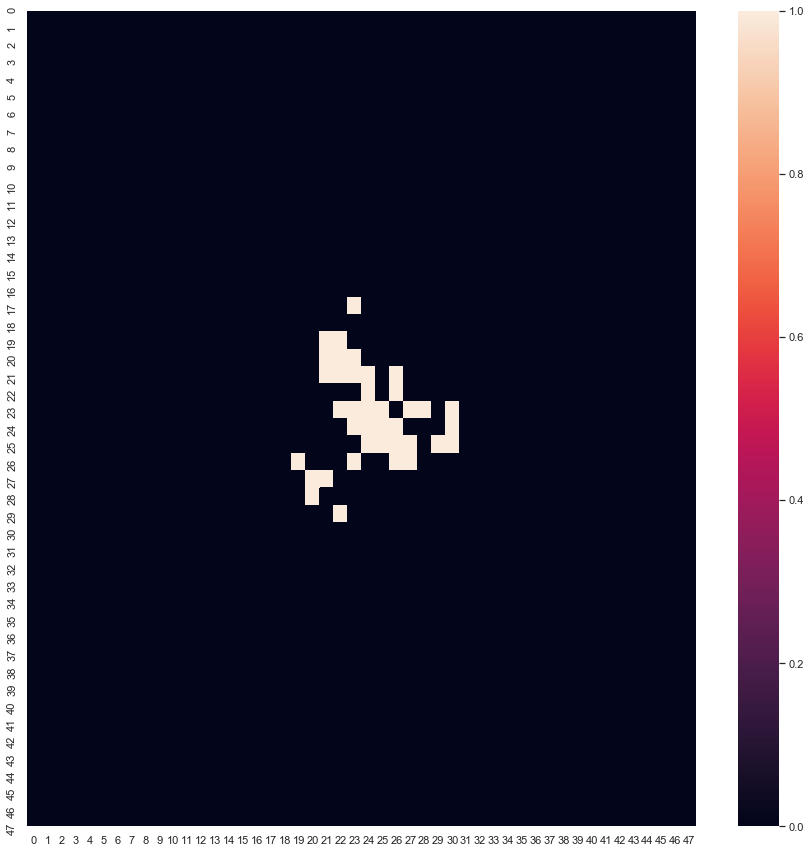

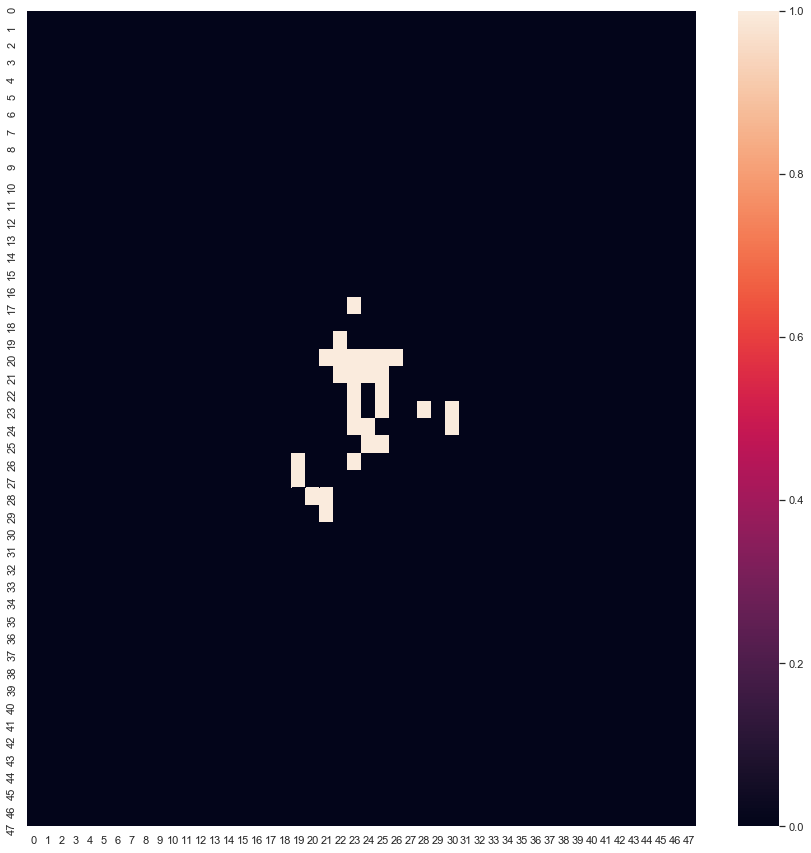

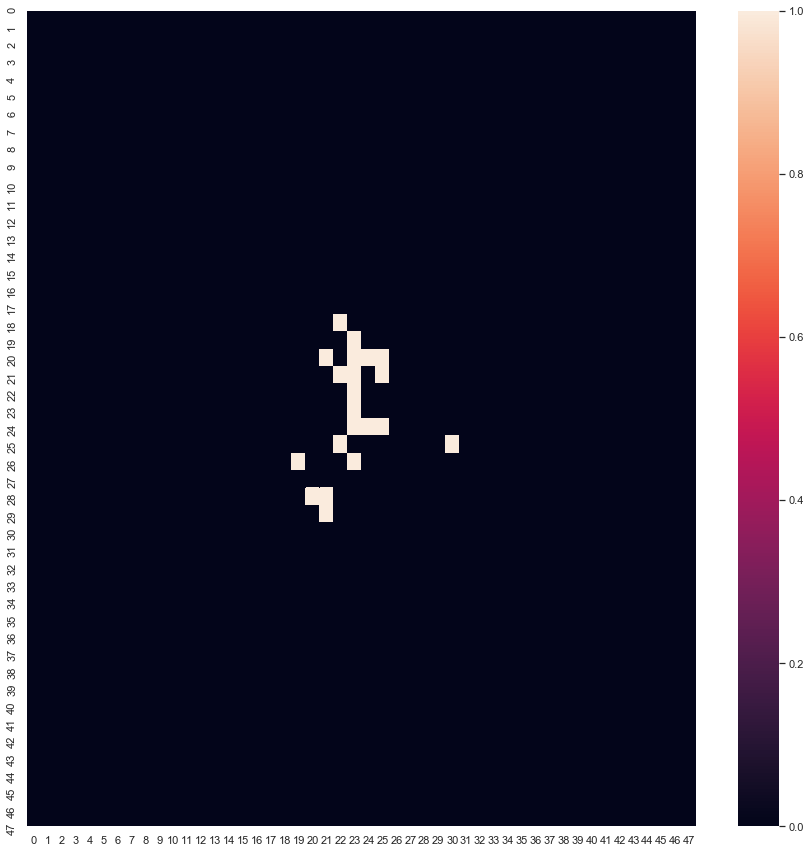

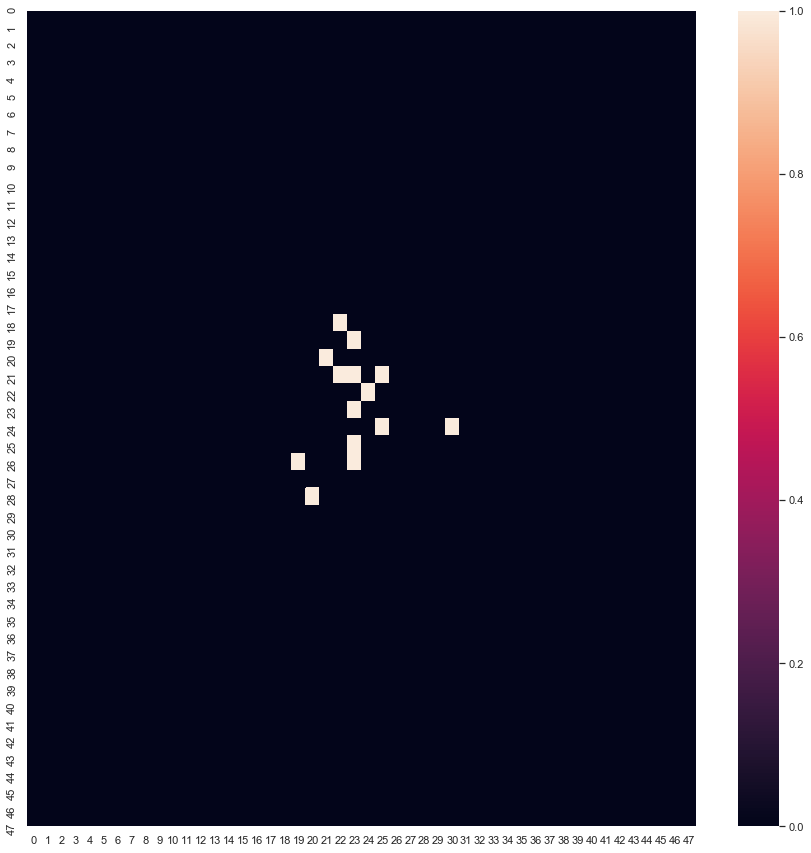

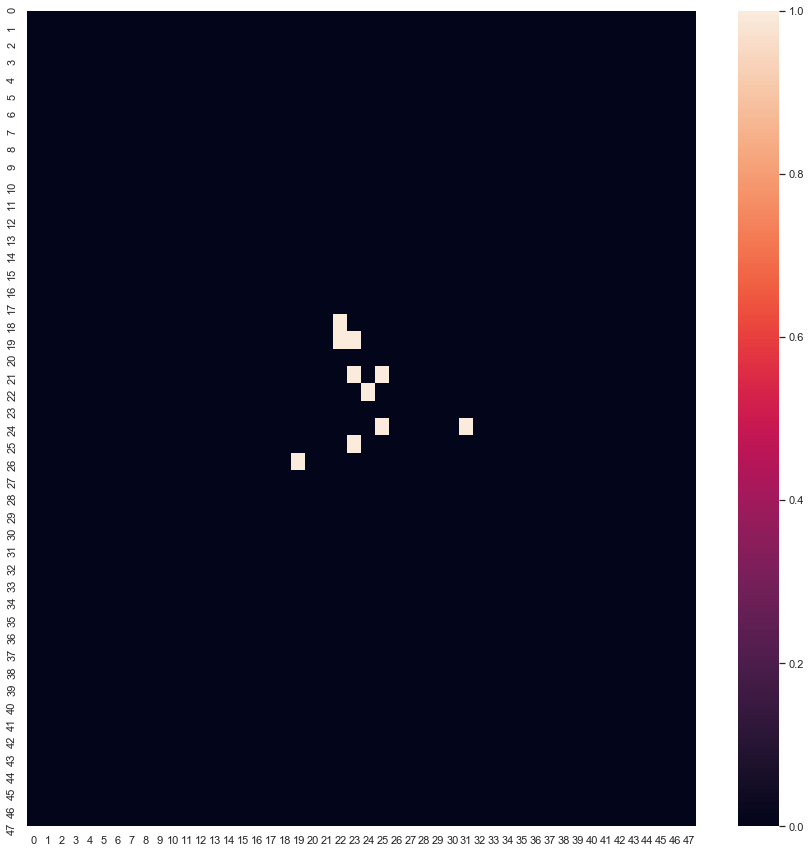

In [8]:
import cv2
import os


folder_name2 = 'thesis_plots'
filename2 = "run1_multiple_label"
directory2 = "plots/" + folder_name2 + "/" + filename2
if not os.path.exists(directory2):
    os.makedirs(directory2)

print('* ... Saving... *')
lnum = 2
for layer in run_labels[:, :, :, 0]:
    plt.figure()
    sns.set(rc={'figure.figsize':(15.0,15.0)})
    sns_plot = sns.heatmap(layer, linewidth=0.00, linecolor="White")
    fig = sns_plot.get_figure()
    img_filename = directory2 + '/layer' + str(lnum) + '.png'
    fig.savefig(img_filename)
    lnum += 1


In [6]:
import cv2
import os

image_folder = 'plots/thesis_plots/run1/'
video_name = 'shower.mp4'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for i in range(1, 31):
    image = image_folder + 'layer%i.png' %(i)
    print(image)
    video.write(cv2.imread(image))

cv2.destroyAllWindows()
video.release()

plots/thesis_plots/run1/layer1.png
plots/thesis_plots/run1/layer2.png
plots/thesis_plots/run1/layer3.png
plots/thesis_plots/run1/layer4.png
plots/thesis_plots/run1/layer5.png
plots/thesis_plots/run1/layer6.png
plots/thesis_plots/run1/layer7.png
plots/thesis_plots/run1/layer8.png
plots/thesis_plots/run1/layer9.png
plots/thesis_plots/run1/layer10.png
plots/thesis_plots/run1/layer11.png
plots/thesis_plots/run1/layer12.png
plots/thesis_plots/run1/layer13.png
plots/thesis_plots/run1/layer14.png
plots/thesis_plots/run1/layer15.png
plots/thesis_plots/run1/layer16.png
plots/thesis_plots/run1/layer17.png
plots/thesis_plots/run1/layer18.png
plots/thesis_plots/run1/layer19.png
plots/thesis_plots/run1/layer20.png
plots/thesis_plots/run1/layer21.png
plots/thesis_plots/run1/layer22.png
plots/thesis_plots/run1/layer23.png
plots/thesis_plots/run1/layer24.png
plots/thesis_plots/run1/layer25.png
plots/thesis_plots/run1/layer26.png
plots/thesis_plots/run1/layer27.png
plots/thesis_plots/run1/layer28.png
p

# Save multiple hits as single runs

In [9]:
from utils.multiple_hits_utils import read_multiple_hits
import h5py
import numpy as np

In [10]:
en1 = 20
en2 = 24
num_runs = 500
name = 'center_%.1fGeV_outside_%.1f_%iruns' %(en1, en2, num_runs)
images, labels, my_dict = read_multiple_hits('simulations/multiple_hits/', name, 
                                             add_noise=False, read_dict=True)

In [24]:
random_mask = np.arange(num_runs)
np.random.shuffle(random_mask)
images = images[random_mask]
labels = labels[random_mask]

In [28]:
random_mask[0]

251

In [26]:
new_dict = {}
for i in range(num_runs):
    new_i = random_mask[i]
    d = my_dict[str(new_i)]
    new_dict[str(i)] = d
    
    name = 
    

In [40]:
direct = 'simulations/multiple_hits_singleruns/data/'
filename = direct + 'train'
for i in range(num_runs):
    
    img = images[i]
    label = labels[i]
    img_name = filename + '_images/' + 'image_%.3i.h5' %(i+1)
    label_name = filename + '_labels/' + 'label_%.3i.h5' %(i+1)
    
    f = h5py.File(img_name, "w")
    f.create_dataset('dataset_1', dtype='f', data=img)
    f.close()

    f2 = h5py.File(label_name, "w")
    f2.create_dataset('dataset_1', dtype='f', data=label)
    f2.close()